# Chicago Crime Data Analysis (2001-2022)

This notebook answers questions about crime trends in Chicago using the crime dataset (2001-2022).

---

## Table of Contents

1. [Setup & Data Loading](#setup)  
2. [Data Preparation](#preparation)  
3. [Topic 1: Comparing Police Districts (2022)](#topic1)  
4. [Topic 2: Crimes Across the Years](#topic2)  
5. [Topic 3: Comparing AM vs PM Rush Hour](#topic3)  
---

<a id='setup'></a>
## 1. Setup & Data Loading

In [36]:
# Mount Google Drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import os

# Define path to your Data folder (update if necessary)
data_path = '/content/drive/MyDrive/Dataset/Data'

# List files in the Data folder
files = os.listdir(data_path)
print(f"Files in Data folder: {files[:5]} ...")

Files in Data folder: ['Chicago-Crime_2001.csv', 'Chicago-Crime_2002.csv', 'Chicago-Crime_2003.csv', 'Chicago-Crime_2004.csv', 'Chicago-Crime_2005.csv'] ...


In [38]:
# Load all CSV files and combine them into a single DataFrame
all_dataframes = []

for file in sorted(files):
    if file.endswith('.csv'):
        file_path = os.path.join(data_path, file)
        df = pd.read_csv(file_path)
        all_dataframes.append(df)

crime_df = pd.concat(all_dataframes, ignore_index=True)

print(f"Combined dataset shape: {crime_df.shape}")

Combined dataset shape: (7713109, 12)


<a id='preparation'></a>
## 2. Data Preparation

- Convert the 'Date' column to datetime format  
- Drop missing dates  
- Sort and set Date as index for time series analysis

In [39]:
# Convert 'Date' to datetime
crime_df['Date'] = pd.to_datetime(crime_df['Date'], errors='coerce')

# Drop rows with invalid dates
crime_df = crime_df.dropna(subset=['Date'])

# Sort by Date
crime_df = crime_df.sort_values('Date')

# Set Date as index
crime_df.set_index('Date', inplace=True)

print("Data prepared. Here's a quick look:")
crime_df.head()

Data prepared. Here's a quick look:


,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN


<a id='topic1'></a>
## 3. Topic 1: Comparing Police Districts (2022)

Which district had the most and least crimes in 2022?

In [40]:
# Filter for 2022 data
crimes_2022 = crime_df[crime_df.index.year == 2022]

# Count crimes by District
district_counts = crimes_2022['District'].value_counts()

most_crime_district = district_counts.idxmax()
least_crime_district = district_counts.idxmin()

print(f"Most crimes in 2022: District {most_crime_district} with {district_counts[most_crime_district]} crimes.")
print(f"Least crimes in 2022: District {least_crime_district} with {district_counts[least_crime_district]} crimes.")

Most crimes in 2022: District 8.0 with 14805 crimes.
Least crimes in 2022: District 31.0 with 15 crimes.


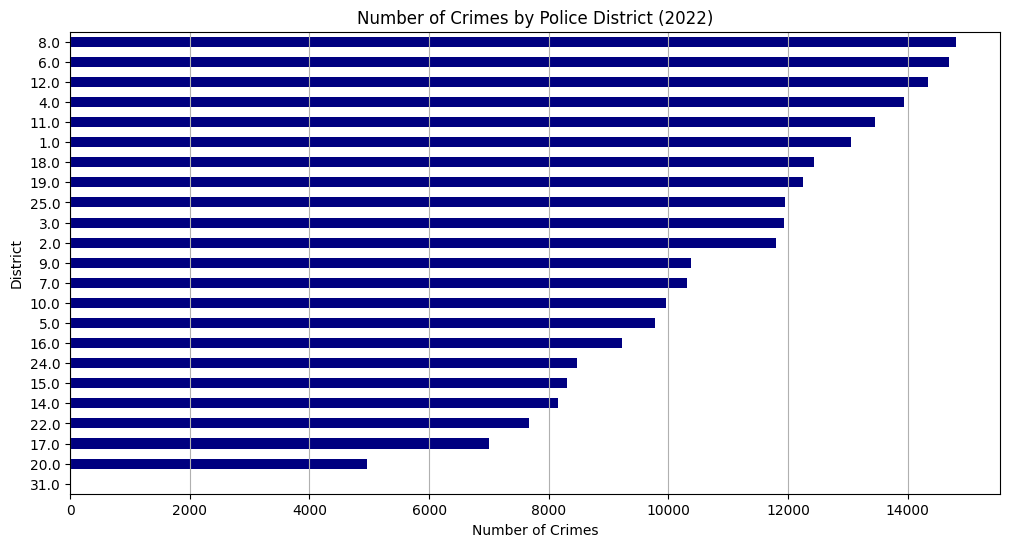

In [41]:
# Visualize crime counts by district in 2022
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
district_counts.sort_values().plot(kind='barh', color='navy')
plt.title('Number of Crimes by Police District (2022)')
plt.xlabel('Number of Crimes')
plt.ylabel('District')
plt.grid(axis='x')
plt.show()

<a id='topic2'></a>
## 4. Topic 2: Crimes Across the Years

- Total crime trend from 2001 to 2022  
- Check trends of top 10 individual crime types  

/tmp/ipython-input-496651033.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_crimes = crime_df.resample('Y').size()


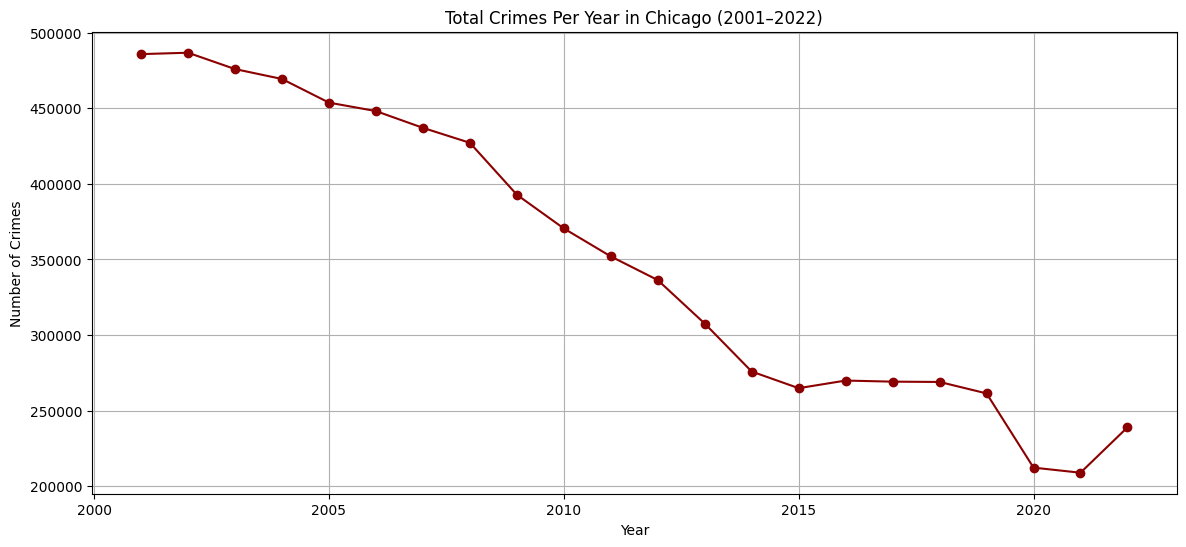

In [42]:
# Total crimes per year
annual_crimes = crime_df.resample('Y').size()

plt.figure(figsize=(14,6))
plt.plot(annual_crimes.index.year, annual_crimes.values, marker='o', color='darkred')
plt.title("Total Crimes Per Year in Chicago (2001–2022)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.show()

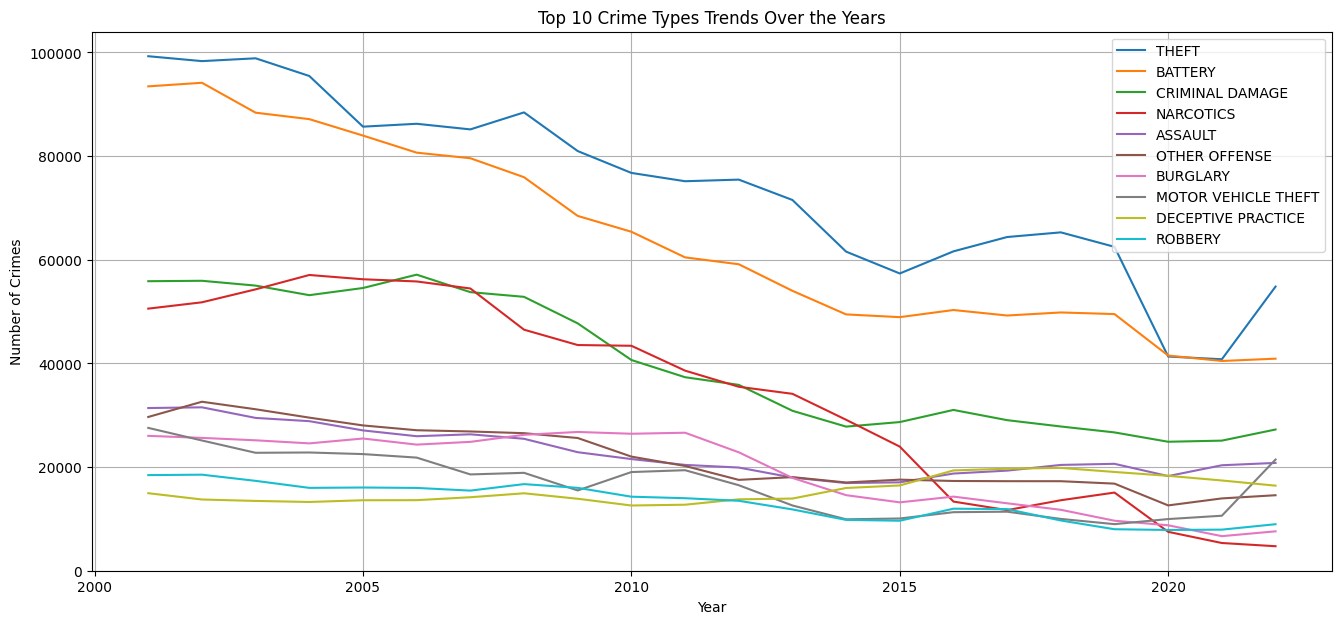

In [43]:
# Top 10 most frequent crime types
top_types = crime_df['Primary Type'].value_counts().head(10).index

# Yearly counts for top crimes
crime_type_trends = crime_df.groupby([crime_df.index.year, 'Primary Type']).size().unstack(fill_value=0)

plt.figure(figsize=(16,7))
for crime_type in top_types:
    plt.plot(crime_type_trends.index, crime_type_trends[crime_type], label=crime_type)

plt.title('Top 10 Crime Types Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend()
plt.grid(True)
plt.show()

<a id='topic3'></a>
## 5. Topic 3: Comparing AM vs PM Rush Hour

- Are crimes more common during AM (7AM-10AM) or PM (4PM-7PM) rush hours?  
- What are the top 5 crimes in each rush hour?  
- Are Motor Vehicle Thefts more common in AM or PM rush hours?

In [44]:
# Extract hour from datetime index
crime_df['Hour'] = crime_df.index.hour

# Define AM and PM rush hours
am_rush = crime_df[(crime_df['Hour'] >= 7) & (crime_df['Hour'] < 10)]
pm_rush = crime_df[(crime_df['Hour'] >= 16) & (crime_df['Hour'] < 19)]

print(f"Total crimes during AM rush hour (7-10AM): {len(am_rush)}")
print(f"Total crimes during PM rush hour (4-7PM): {len(pm_rush)}")

Total crimes during AM rush hour (7-10AM): 770651
Total crimes during PM rush hour (4-7PM): 1206353


In [45]:
# Top 5 crimes during AM rush hour
print("Top 5 crimes during AM rush hour:")
print(am_rush['Primary Type'].value_counts().head(5))

Top 5 crimes during AM rush hour:
Primary Type
THEFT              185239
BATTERY            108199
CRIMINAL DAMAGE     81281
BURGLARY            73999
OTHER OFFENSE       62453
Name: count, dtype: int64


In [46]:
# Top 5 crimes during PM rush hour
print("Top 5 crimes during PM rush hour:")
print(pm_rush['Primary Type'].value_counts().head(5))

Top 5 crimes during PM rush hour:
Primary Type
THEFT              293514
BATTERY            213002
CRIMINAL DAMAGE    134101
NARCOTICS          103032
ASSAULT             89600
Name: count, dtype: int64


In [47]:
# Motor Vehicle Thefts AM vs PM
am_mvt_count = am_rush[am_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
pm_mvt_count = pm_rush[pm_rush['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

print(f"Motor Vehicle Thefts during AM rush hour: {am_mvt_count}")
print(f"Motor Vehicle Thefts during PM rush hour: {pm_mvt_count}")

Motor Vehicle Thefts during AM rush hour: 41578
Motor Vehicle Thefts during PM rush hour: 53716


# Conclusion

## Interpretation and Conclusions:

1. Crime Distribution by Police District (2022):
   - District 8 recorded the highest number of crimes in 2022 with 14,805 incidents.
   - District 31 had the lowest crime rate with only 15 crimes.
   - This shows a significant variation in crime levels across different police districts.
2. Total Crimes Per Year in Chicago (2001–2022):
   - There has been a clear declining trend in the total number of crimes over the years from about 480,000 in 2001 to around 240,000 in 2022.
   - This indicates an overall improvement in public safety or effectiveness of crime prevention measures.
   - However, there are some fluctuations around 2015-2019 and a slight increase again around 2022.
3. Top 10 Crime Types Trends Over the Years:
   - Theft and Battery are consistently the two most common crime types, though both have shown a general decline.
   - Narcotics, Criminal Damage, and Assault show declining trends but with some variations.
   - Some crime types like Deceptive Practice have remained relatively steady.
   - Robbery and Motor Vehicle Theft have shown reductions over time.
4. Rush Hour Crime Patterns:
   - There are significantly more crimes during PM rush hours (4-7 PM) compared to AM rush hours (7-10 AM).
   - Theft and Battery top the list during both rush hours, with thefts nearly doubling in the PM rush hour compared to AM.
   - Motor Vehicle Thefts are higher in the PM rush hour as well.

## Overall Insights:

- Crime in Chicago has been decreasing steadily over the past two decades, indicating progress in law enforcement and possibly socio-economic improvements.
- Crime is not evenly distributed geographically, with certain districts like District 8 facing much higher crime rates.
- Rush hour crime data suggests more vigilance is needed during late afternoons and early evenings.
- Theft and battery remain the most prevalent issues, requiring focused preventive strategies.